

---



---


# KNN x Regressão Logística x SVM x **MLP** - Iris Dataset

Este notebook mostra o uso de métodos de aprendizado de máquina existentes na biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) para realizar a classificação do conjunto de dados **Iris** ([Iris Dataset](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets)).

Os **algoritmos de aprendizagem de máquina** utilizados são:

* [KNeighborsClassifier - KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier): algoritmo de k-vizinhos mais próximos
* [LogisticRegression - LogReg](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression): Regressão Logística
*[Support Vector Machines - SVM](https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm): Máquina de Vetores de Suporte
*[MLPClassifier - MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier): rede neural de perceptrons multicamadas



**Iris Dataset**

O conjunto de dados Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher com o objetivo de quantificar a variação morfológica das flores da íris de três espécies relacionadas. 

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, Fisher desenvolveu um modelo discriminante para distinguir as espécies umas das outras.

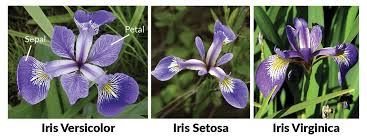

- Número de classes: 3 (setosa, virginica e versicolor)
- Amostras por classe: 50
- Total de amostras: 150
- Número de atributos (dimensionalidade): 4 (comprimento das sépalas, largura das sépalas, comprimento das sépalas e largura das pétalas)



---



---



## Importa módulo com funções para medir o desempenho do classificador

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

### Importação dos dados - Iris dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
class_names = iris.target_names
X = iris.data
y = iris.target
#print(type(X)) 
#print(X.shape)
#print(X)
#print(y.shape)
#print(y)

## Redução de dimensionalidade usando PCA (*Principal Component Analysis*)

Para melhor entendimento e compreensão da estrutura dos dados aplicamos o algoritmo de redução de dimensionalidade [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) para visualizarmos os dados em 3 dimensões.

Essa técnica de análise dos componentes principais é comumente usada para
compressão, visualização e classificação de dados. A ideia central é reduzir a dimensionalidade de um conjunto de dados com o mínimo de perda de informação.

As componentes principais em geral são extraídas via matriz de covariância, as quais são influenciadas pelas variáveis de maior variância.

Baseado em: 
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py
-https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

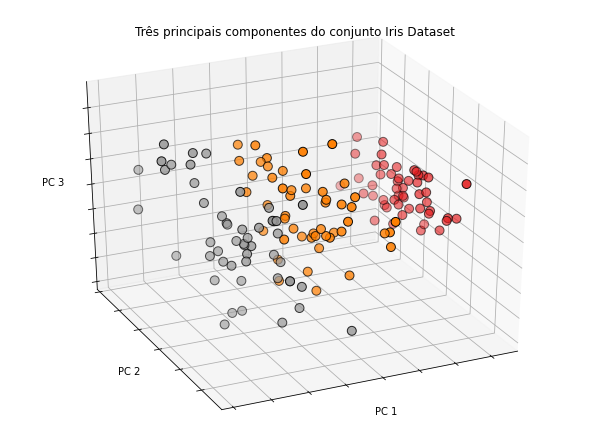

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=115)
X_reduced = PCA(n_components=3).fit_transform(iris.data) # aplicação da PCA
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=80)
ax.set_title("Três principais componentes do conjunto Iris Dataset")
ax.set_xlabel("PC 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC 3")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Separar em dois conjuntos de dados (treinamento e teste)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) 

## Aplicação do KNN

Taxa de acerto =  100.0 %

Matriz de confusão:



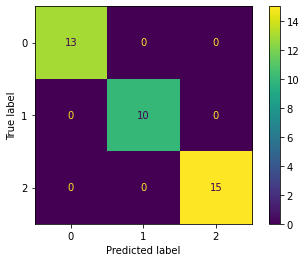

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20) 
knn.fit(X_train,y_train)
classificacoes_knn = knn.predict(X_test)
acertos_knn = metrics.accuracy_score(y_test,classificacoes_knn)
print('Taxa de acerto = ',round(acertos_knn*100,2),"%\n")
# matriz de confusão
print('Matriz de confusão:\n')
knn = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
#print(knn.confusion_matrix)
plt.show()

## Aplicação da Regressão Logística

Taxa de acerto =  97.37 %

Matriz de confusão:



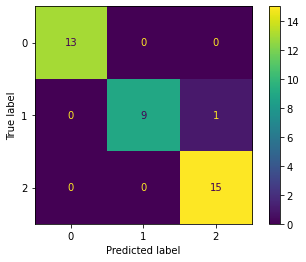

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear') # liblinear => conjuntos pequenos
logreg.fit(X_train,y_train)
classificacoes_logreg = logreg.predict(X_test)
acertos_LogReg = metrics.accuracy_score(y_test,classificacoes_logreg)
print('Taxa de acerto = ',round(acertos_LogReg*100,2),"%\n")
# matriz de confusão
print('Matriz de confusão:\n')
logreg = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
#print(logreg.confusion_matrix)
plt.show()

## Aplicação do SVM

Taxa de acerto =  100.0 %

Matriz de confusão:



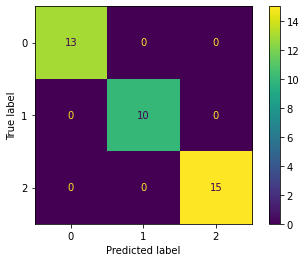

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
classificacoes_svm = svm.predict(X_test)
acertos_svm = metrics.accuracy_score(y_test, classificacoes_svm)
print('Taxa de acerto = ',round(acertos_svm*100,2),"%\n")
# matriz de confusão
print('Matriz de confusão:\n')
svm = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
#print(svm.confusion_matrix)
plt.show()

## Aplicação da rede MLP

Taxa de acerto =  100.0 %

Matriz de confusão:



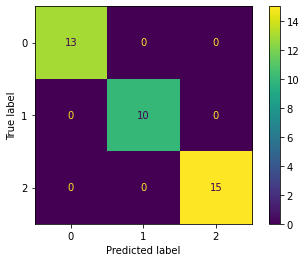

In [ ]:
from sklearn.neural_network import MLPClassifier
#import warnings

#warnings.simplefilter("ignore")
mlp = MLPClassifier(hidden_layer_sizes=(30,), solver='lbfgs', max_iter = 500)
mlp.fit(X_train, y_train)
classificacoes_mlp = mlp.predict(X_test)
acertos_mlp = metrics.accuracy_score(y_test, classificacoes_mlp)
print('Taxa de acerto = ',round(acertos_mlp*100,2),"%\n")
# matriz de confusão
print('Matriz de confusão:\n')
mlp = ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
#print(mlp.confusion_matrix)
plt.show()

In [ ]:
print(mlp.n_iter_)